<a href="https://colab.research.google.com/github/Vishal061/Linear_regression/blob/main/linear_regpert1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
df=pd.read_csv("/content/height-weight.csv")

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [7]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


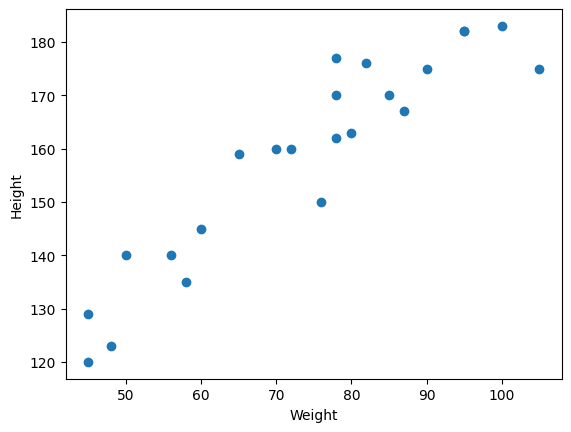

In [8]:
# scatter plot
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [9]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


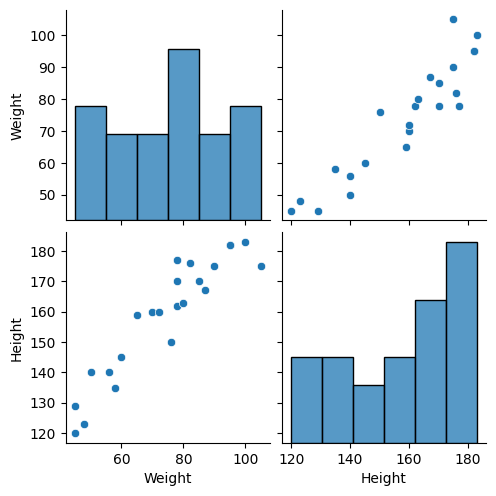

In [10]:
sn.pairplot(df)

In [11]:
# independent and dependent Feature
x=df[["Weight"]]  #must be 2-D array
y=df["Height"]

In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [14]:
x_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
print("Coefficient of model =" , model.coef_)
print("Intercept of model =", model.intercept_)

Coefficient of model = [17.73635106]
Intercept of model = 158.88888888888889


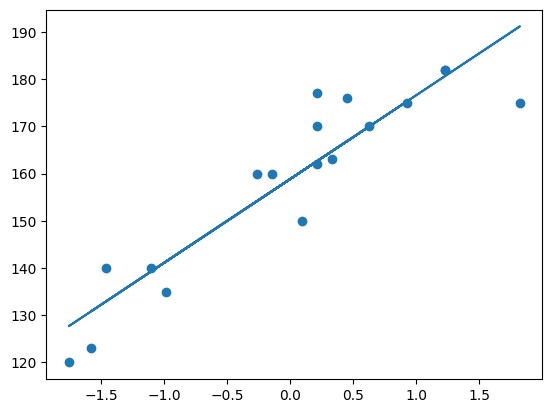

In [17]:
#Plotting the best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))

prediction of test data
predicted height output= intercept +coef_(Weights)
y_pred_test =156.470 + 17.29(X_test)

In [18]:
# prediction of test data
y_pred=model.predict(x_test)

In [20]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error

In [21]:
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)
print("mse=",mse)
print("mae=",mae)
print("rmse=",rmse)

mse= 28.276946048811972
mae= 4.179973432576932
rmse= 5.317607173232334


In [22]:
from sklearn.metrics import r2_score

R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [23]:
score=r2_score(y_test,y_pred)
print(score)

0.9171832648523548


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables



In [24]:
# Adjusted r2_square
adjusted_r2_square=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1)

In [25]:
print(adjusted_r2_square)

0.8895776864698064


In [26]:
# OLS linear_Regression
from statsmodels.api import OLS

In [28]:
model_ols=OLS(y_train,x_train).fit()

In [29]:
prediction=model_ols.predict(x_test)
print(prediction)

[-31.20511807 -10.04910582 -15.33810888  26.97391562  13.22250766]


In [ ]:
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.046
Method:                 Least Squares   F-statistic:                             0.2114
Date:                Mon, 04 Sep 2023   Prob (F-statistic):                       0.652
Time:                        15:23:44   Log-Likelihood:                         -116.79
No. Observations:                  18   AIC:                                      235.6
Df Residuals:                      17   BIC:                                      236.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
